In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

In [3]:
path = "subject_5_EMG.csv"

df = pd.read_csv(path)

In [4]:
X_df = df.drop(["Task_number", "Sample_num", "Timestamp", "Video_timestamp", "Angle_sample"], axis=1)
y_df = df["Task_number"]

# XGBoost

In [5]:
modelo_final = pickle.load(open('modelo_XGB.pkl','rb'))

In [6]:
predicciones = modelo_final.predict(X_df)

In [7]:
y_test_numeric = np.array(y_df)
predicciones_numeric = np.array(predicciones)

In [8]:
print(classification_report(y_df, predicciones, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     29854
         1.0       1.00      0.00      0.00      1015
         2.0       1.00      0.00      0.00      1052
         3.0       1.00      0.00      0.00      1147
         4.0       1.00      0.00      0.00      1125
         5.0       1.00      0.00      0.00      1115
         6.0       1.00      0.00      0.00       976
         7.0       1.00      0.00      0.00      1381

    accuracy                           0.79     37665
   macro avg       0.97      0.12      0.11     37665
weighted avg       0.84      0.79      0.70     37665



In [9]:
xgb_accuracy = balanced_accuracy_score(y_df, predicciones)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.125


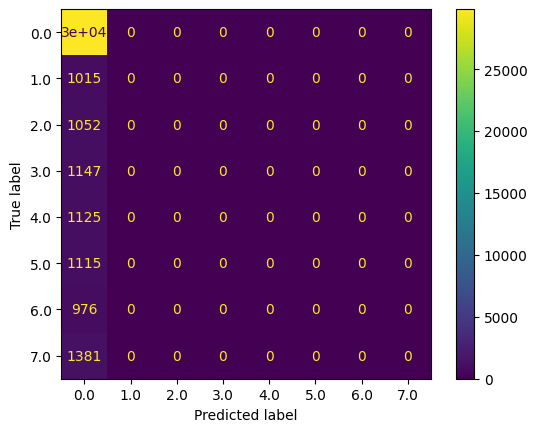

In [10]:
cm = confusion_matrix(y_df, predicciones)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_df))
disp.plot()
plt.show()

# Comparación Modelos

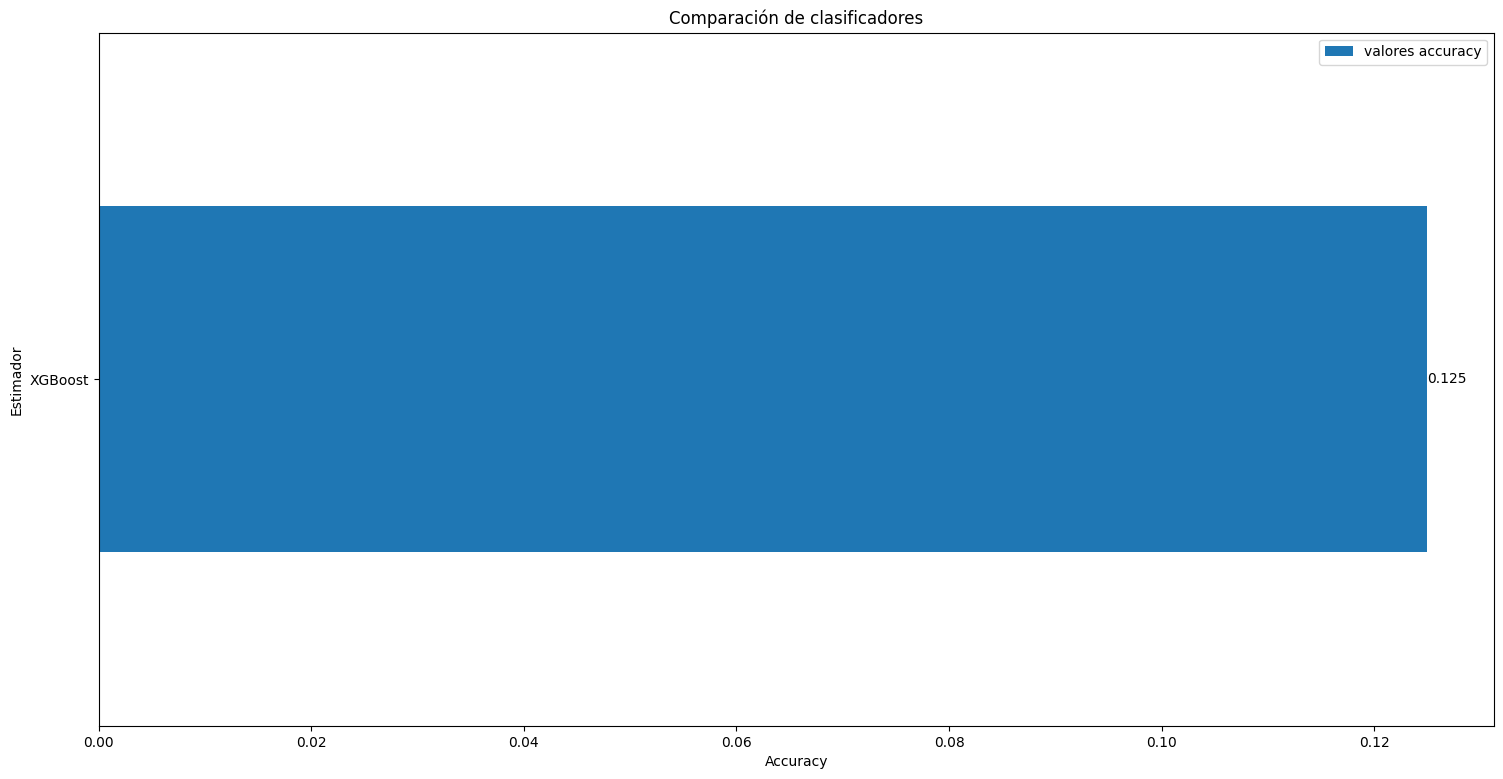

In [11]:
df_comparacion = pd.DataFrame({
                    'estimador': ['XGBoost'],
                    'valores accuracy': [xgb_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)